# üîπ UFC Fight Predictor Model Training

<div style="text-align: center;">
  üîπ <img src="../img/ufc_logo.png" width="50" /> üîπ
</div>

## 1. Import Libraries and Setup Environment

In [1]:
# Import necessary libraries
import os
import sys
import pandas as pd

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Import from /src
sys.path.append(os.path.join(project_root, 'src'))
from utils.metrics import *
from models.model_factory import *
from utils.io_model import *
from utils.helpers import *

# Define the path to the CSV file
train_path = os.path.join(project_root, 'data', 'processed', 'ufc_train.csv')
test_path = os.path.join(project_root, 'data', 'processed', 'ufc_test.csv')

<div style="text-align: center;">
  üîπ <img src="../img/ufc_logo.png" width="50" /> üîπ
</div>

## 2. Load Data

In [2]:
# Load the CSV into a DataFrame
try:
    ufc_train = pd.read_csv(train_path)
    print_header(f"Data Training successfully loaded: {ufc_train.shape[0]} rows, {ufc_train.shape[1]} columns.", color='bright_green')
except Exception as e:
    print_header(f"Error loading training data: {e}", color='bright_red')

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Data Training successfully loaded: 5232 rows, 47 columns.  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù


In [3]:
# Load the CSV into a DataFrame
try:
    ufc_test = pd.read_csv(test_path)
    print_header(f"Data Testing successfully loaded: {ufc_test.shape[0]} rows, {ufc_test.shape[1]} columns.", color='bright_green')
except Exception as e:
    print_header(f"Error loading testing data: {e}", color='bright_red')

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Data Testing successfully loaded: 1309 rows, 47 columns.  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù


<div style="text-align: center;">
  üîπ <img src="../img/ufc_logo.png" width="50" /> üîπ
</div>

## 3. üîß Hyperparameters Tuning üîß

In [34]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

hyperparameter_tuning = True

if hyperparameter_tuning:
    print_header('Hyperparameters Tuning is Activated', color = 'bright_blue')
    model_params = {
    "Support Vector Machine": (
        SVC(probability=True),
        {'C': [0.1, 1], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['auto']}
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 10]}
    ),
    "Logistic Regression": (
        LogisticRegression(),
        {'C': [0.01, 0.1, 1], 'solver': ['liblinear', 'lbfgs']}
    ),
    "K-Nearest Neighbors": (
        KNeighborsClassifier(),
        {'n_neighbors': [3, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
    ),
    "AdaBoost": (
        AdaBoostClassifier(),
        {'n_estimators': [10, 50, 100], 'learning_rate': [0.01, 1.0, 10.0]}
    ),
    "Naive Bayes": (
        GaussianNB(),
        {'var_smoothing': [1e-8, 1e-7, 1e-6, 1e-5]}
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(),
        {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [3, 5]}
    ),
    "Extra Trees": (
        ExtraTreesClassifier(),
        {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
    ),
    "Quadratic Discriminant Analysis": (
        QuadraticDiscriminantAnalysis(),
        {'reg_param': [0.01, 0.1, 1, 10]}
    )
}
else:
    print_header('Hyperparameters Tuning Off', color = 'bright_red')
    model_params = None # Default Settings

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Hyperparameters Tuning is Activated  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù


<div style="text-align: center;">
  üîπ <img src="../img/ufc_logo.png" width="50" /> üîπ
</div>

## 4. üîπ UFC Machine Learning Training

### 4.1 KNN Model Training

#### üöÄ KNN Training 

In [5]:
model_name = 'K-Nearest Neighbors'
knn_model = model_factory(model_name, ufc_train, model_params)

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  [K-Nearest Neighbors] UFC GridSearchCV Training  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù


INFO:root:[K-Nearest Neighbors] ü§ñ Training...


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.546 total time=   0.1s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.529 total time=   0.1s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.563 total time=   0.1s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.524 total time=   0.1s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.543 total time=   0.1s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.545 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.528 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.563 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.525 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.542 tota

INFO:root:[K-Nearest Neighbors] üîç Best Score: 0.5650
[K-Nearest Neighbors] üîç Best Params: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}


#### üîç KNN Metrics

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Starting Evaluation for: [K-Nearest Neighbors]  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Best Parameters Found with GridSearch: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚

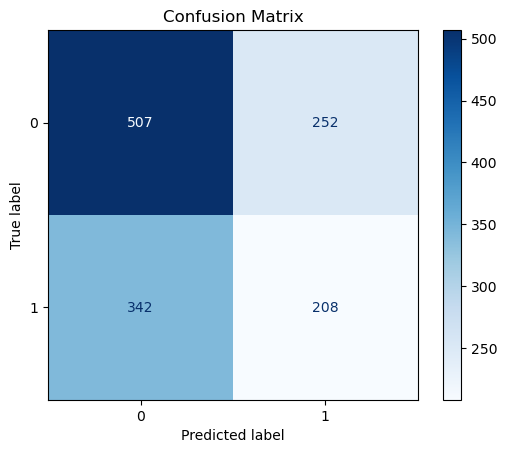

In [6]:
knn_metrics = evaluate_model(knn_model, ufc_test)

### 4.2 Support Vector Machine Model 

#### üöÄ Support Vector Machine Training 

In [7]:
model_name = 'Support Vector Machine'
svm_model = model_factory(model_name, ufc_train, model_params)

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  [Support Vector Machine] UFC GridSearchCV Training  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù


INFO:root:[Support Vector Machine] ü§ñ Training...


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.607 total time=   5.6s
[CV 2/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.604 total time=   5.0s
[CV 3/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.595 total time=   5.3s
[CV 4/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.594 total time=   5.1s
[CV 5/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.587 total time=   5.4s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.580 total time=   5.8s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.580 total time=   5.8s
[CV 3/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.580 total time=   6.1s
[CV 4/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.580 total time=   6.1s
[CV 5/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.580 total time=   5.8s
[CV 1/5] END ....C=0.1, gamma=auto, kernel=poly;, score=0.582 total time=   5.0s
[CV 2/5] END ....C=0.1, gamma=auto, kernel=poly;,

INFO:root:[Support Vector Machine] üîç Best Score: 0.6026
[Support Vector Machine] üîç Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


#### üîç Support Vector Machine Metrics

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Starting Evaluation for: [Support Vector Machine]  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Best Parameters Found with GridSearch: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï

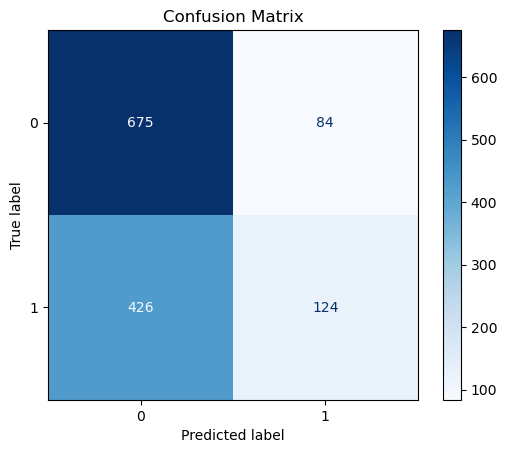

In [8]:
svm_metrics = evaluate_model(svm_model, ufc_test)

### 4.3 Logistic Regression Model

#### üöÄ Logistic Regression Training

In [9]:
model_name = 'Logistic Regression'
lr_model = model_factory(model_name, ufc_train, model_params)

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  [Logistic Regression] UFC GridSearchCV Training  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù


INFO:root:[Logistic Regression] ü§ñ Training...


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..........C=0.01, solver=liblinear;, score=0.616 total time=   0.0s
[CV 2/5] END ..........C=0.01, solver=liblinear;, score=0.594 total time=   0.0s
[CV 3/5] END ..........C=0.01, solver=liblinear;, score=0.614 total time=   0.0s
[CV 4/5] END ..........C=0.01, solver=liblinear;, score=0.589 total time=   0.0s
[CV 5/5] END ..........C=0.01, solver=liblinear;, score=0.602 total time=   0.0s
[CV 1/5] END ..............C=0.01, solver=lbfgs;, score=0.609 total time=   0.0s
[CV 2/5] END ..............C=0.01, solver=lbfgs;, score=0.597 total time=   0.0s
[CV 3/5] END ..............C=0.01, solver=lbfgs;, score=0.611 total time=   0.0s
[CV 4/5] END ..............C=0.01, solver=lbfgs;, score=0.594 total time=   0.0s
[CV 5/5] END ..............C=0.01, solver=lbfgs;, score=0.604 total time=   0.0s
[CV 1/5] END ...........C=0.1, solver=liblinear;, score=0.618 total time=   0.0s
[CV 2/5] END ...........C=0.1, solver=liblinear;,

INFO:root:[Logistic Regression] üîç Best Score: 0.6089
[Logistic Regression] üîç Best Params: {'C': 1, 'solver': 'liblinear'}


#### üîç Logistic Regression Metrics

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Starting Evaluation for: [Logistic Regression]  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Best Parameters Found with GridSearch: {'C': 1, 'solver': 'liblinear'}  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
üîç Model Evaluation Metrics üîç:
Accuracy: 0.6280
Precision: 0.6113
Recall: 0.3145
F1 s

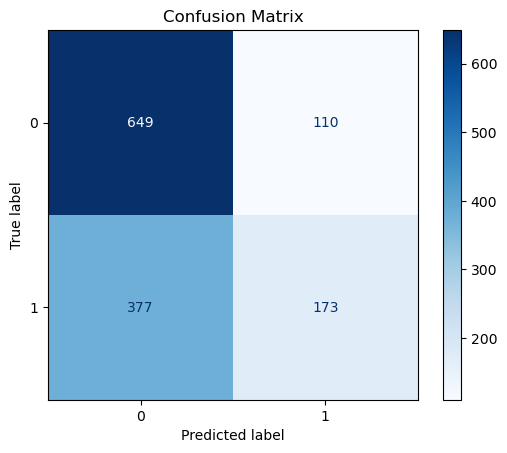

In [10]:
lr_metrics = evaluate_model(lr_model, ufc_test)

### 4.4 Random Forest Model

#### üöÄ Random Forest Training

In [11]:
model_name = 'Random Forest'
rf_model = model_factory(model_name, ufc_train)

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  [Random Forest] UFC GridSearchCV Training  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù


INFO:root:[Random Forest] ü§ñ Training...


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......max_depth=3, n_estimators=10;, score=0.588 total time=   0.0s
[CV 2/5] END ......max_depth=3, n_estimators=10;, score=0.585 total time=   0.0s
[CV 3/5] END ......max_depth=3, n_estimators=10;, score=0.594 total time=   0.0s
[CV 4/5] END ......max_depth=3, n_estimators=10;, score=0.589 total time=   0.0s
[CV 5/5] END ......max_depth=3, n_estimators=10;, score=0.579 total time=   0.0s
[CV 1/5] END ......max_depth=3, n_estimators=50;, score=0.590 total time=   0.2s
[CV 2/5] END ......max_depth=3, n_estimators=50;, score=0.591 total time=   0.2s
[CV 3/5] END ......max_depth=3, n_estimators=50;, score=0.590 total time=   0.2s
[CV 4/5] END ......max_depth=3, n_estimators=50;, score=0.581 total time=   0.2s
[CV 5/5] END ......max_depth=3, n_estimators=50;, score=0.596 total time=   0.2s
[CV 1/5] END .....max_depth=3, n_estimators=100;, score=0.594 total time=   0.3s
[CV 2/5] END .....max_depth=3, n_estimators=100;,

INFO:root:[Random Forest] üîç Best Score: 0.6034
[Random Forest] üîç Best Params: {'max_depth': 10, 'n_estimators': 100}


#### üîç Random Forest Metrics

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Starting Evaluation for: [Random Forest]  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Best Parameters Found with GridSearch: {'max_depth': 10, 'n_estimators': 100}  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
üîç Model Evaluation Metrics üîç:
Accuracy: 0.6089
Precision: 0.5896
Recall: 0.22

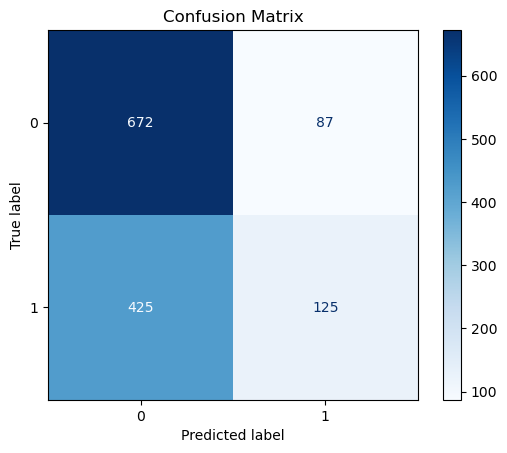

In [12]:
rf_metrics = evaluate_model(rf_model, ufc_test)

### 4.5 AdaBoost Model

#### üöÄ AdaBoost Training

In [13]:
model_name = 'AdaBoost'
ab_model = model_factory(model_name, ufc_train)

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  [AdaBoost] UFC GridSearchCV Training  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù


INFO:root:[AdaBoost] ü§ñ Training...


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.01, n_estimators=10;, score=0.580 total time=   0.1s
[CV 2/5] END learning_rate=0.01, n_estimators=10;, score=0.581 total time=   0.1s
[CV 3/5] END learning_rate=0.01, n_estimators=10;, score=0.580 total time=   0.1s
[CV 4/5] END learning_rate=0.01, n_estimators=10;, score=0.580 total time=   0.1s
[CV 5/5] END learning_rate=0.01, n_estimators=10;, score=0.580 total time=   0.1s
[CV 1/5] END learning_rate=0.01, n_estimators=50;, score=0.580 total time=   0.5s
[CV 2/5] END learning_rate=0.01, n_estimators=50;, score=0.581 total time=   0.5s
[CV 3/5] END learning_rate=0.01, n_estimators=50;, score=0.580 total time=   0.5s
[CV 4/5] END learning_rate=0.01, n_estimators=50;, score=0.580 total time=   0.5s
[CV 5/5] END learning_rate=0.01, n_estimators=50;, score=0.580 total time=   0.5s
[CV 1/5] END learning_rate=0.01, n_estimators=100;, score=0.580 total time=   0.9s
[CV 2/5] END learning_rate=0.01, n_es

INFO:root:[AdaBoost] üîç Best Score: 0.5988
[AdaBoost] üîç Best Params: {'learning_rate': 1.0, 'n_estimators': 100}


#### üîç AdaBoost Metrics

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Starting Evaluation for: [AdaBoost]  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Best Parameters Found with GridSearch: {'learning_rate': 1.0, 'n_estimators': 100}  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
üîç Model Evaluation Metrics üîç:
Accuracy: 0.6073
Precision: 0.5559
Recall: 0.32

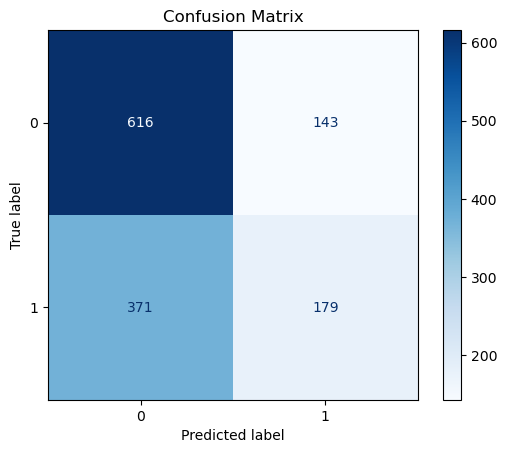

In [14]:
ab_metrics = evaluate_model(ab_model, ufc_test)

### 4.6 Naive Bayes Model

#### üöÄ Naive Bayes Training

In [15]:
model_name = 'Naive Bayes'
nb_model = model_factory(model_name, ufc_train)

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  [Naive Bayes] UFC GridSearchCV Training  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù


INFO:root:[Naive Bayes] ü§ñ Training...


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...............var_smoothing=1e-08;, score=0.585 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-08;, score=0.429 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-08;, score=0.587 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-08;, score=0.543 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-08;, score=0.579 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-07;, score=0.585 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-07;, score=0.432 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-07;, score=0.587 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-07;, score=0.543 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-07;, score=0.579 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-06;, score=0.585 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-06;,

INFO:root:[Naive Bayes] üîç Best Score: 0.5461
[Naive Bayes] üîç Best Params: {'var_smoothing': 1e-06}


#### üîç Naive Bayes Metrics

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Starting Evaluation for: [Naive Bayes]  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Best Parameters Found with GridSearch: {'var_smoothing': 1e-06}  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
üîç Model Evaluation Metrics üîç:
Accuracy: 0.5982
Precision: 0.5276
Recall: 0.4164
F1 score: 0.4654

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Confusion Matrix  ‚

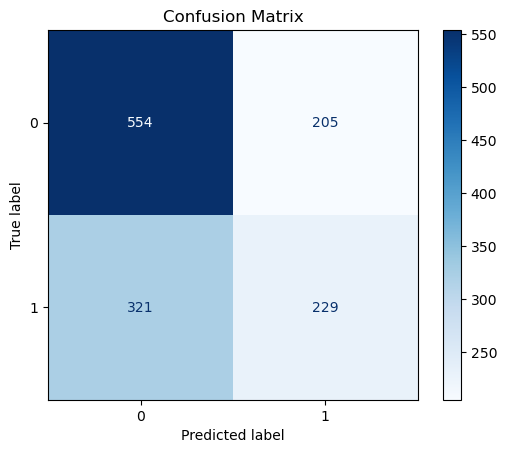

In [16]:
nb_metrics = evaluate_model(nb_model, ufc_test)

### 4.7 Gradient Boosting Model

#### üöÄ Gradient Boosting Training

In [17]:
model_name = "Gradient Boosting"
gb_model = model_factory(model_name, ufc_train)

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  [Gradient Boosting] UFC GridSearchCV Training  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù


INFO:root:[Gradient Boosting] ü§ñ Training...


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.578 total time=   1.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.585 total time=   1.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.588 total time=   1.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.582 total time=   1.1s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.581 total time=   1.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.594 total time=   2.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.587 total time=   2.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.592 total time=   2.1s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.587 total time=   2.1s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.596 tot

INFO:root:[Gradient Boosting] üîç Best Score: 0.6057
[Gradient Boosting] üîç Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


#### üîç Gradient Boosting Metrics

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Starting Evaluation for: [Gradient Boosting]  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Best Parameters Found with GridSearch: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

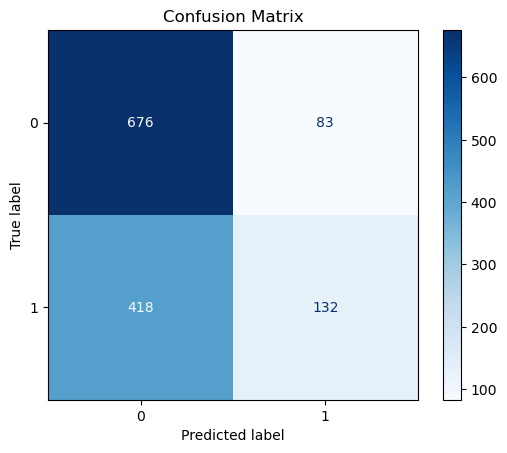

In [18]:
gb_metrics = evaluate_model(gb_model, ufc_test)

### 4.8 Extra Trees Model

#### üöÄ Extra Trees Training

In [19]:
model_name = "Extra Trees"
et_model = model_factory(model_name, ufc_train)

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  [Extra Trees] UFC GridSearchCV Training  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù


INFO:root:[Extra Trees] ü§ñ Training...


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...max_depth=None, n_estimators=50;, score=0.595 total time=   0.4s
[CV 2/5] END ...max_depth=None, n_estimators=50;, score=0.577 total time=   0.4s
[CV 3/5] END ...max_depth=None, n_estimators=50;, score=0.595 total time=   0.4s
[CV 4/5] END ...max_depth=None, n_estimators=50;, score=0.574 total time=   0.4s
[CV 5/5] END ...max_depth=None, n_estimators=50;, score=0.577 total time=   0.4s
[CV 1/5] END ..max_depth=None, n_estimators=100;, score=0.601 total time=   0.7s
[CV 2/5] END ..max_depth=None, n_estimators=100;, score=0.591 total time=   0.7s
[CV 3/5] END ..max_depth=None, n_estimators=100;, score=0.590 total time=   0.7s
[CV 4/5] END ..max_depth=None, n_estimators=100;, score=0.581 total time=   0.7s
[CV 5/5] END ..max_depth=None, n_estimators=100;, score=0.585 total time=   0.7s
[CV 1/5] END .....max_depth=10, n_estimators=50;, score=0.594 total time=   0.1s
[CV 2/5] END .....max_depth=10, n_estimators=50;,

INFO:root:[Extra Trees] üîç Best Score: 0.5906
[Extra Trees] üîç Best Params: {'max_depth': 10, 'n_estimators': 100}


#### üîç Extra Trees Metrics

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Starting Evaluation for: [Extra Trees]  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Best Parameters Found with GridSearch: {'max_depth': 10, 'n_estimators': 100}  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
üîç Model Evaluation Metrics üîç:
Accuracy: 0.5951
Precision: 0.6351
Recall: 0.0855
F1 score: 0

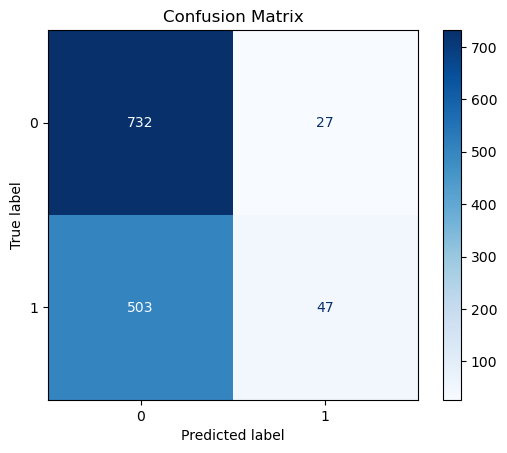

In [20]:
et_metrics = evaluate_model(et_model, ufc_test)

### 4.9 Quadratic Discriminant Analysis Model

#### üöÄ Quadratic Discriminant Analysis Training

In [36]:
model_name = "Quadratic Discriminant Analysis"
qda_model = model_factory(model_name, ufc_train, model_params)

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  [Quadratic Discriminant Analysis] UFC GridSearchCV Training  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù


INFO:root:[Quadratic Discriminant Analysis] ü§ñ Training...


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ....................reg_param=0.01;, score=0.613 total time=   0.0s
[CV 2/5] END ....................reg_param=0.01;, score=0.455 total time=   0.0s
[CV 3/5] END ....................reg_param=0.01;, score=0.578 total time=   0.0s
[CV 4/5] END ....................reg_param=0.01;, score=0.480 total time=   0.0s
[CV 5/5] END ....................reg_param=0.01;, score=0.514 total time=   0.0s
[CV 1/5] END .....................reg_param=0.1;, score=0.600 total time=   0.0s
[CV 2/5] END .....................reg_param=0.1;, score=0.472 total time=   0.0s
[CV 3/5] END .....................reg_param=0.1;, score=0.588 total time=   0.0s
[CV 4/5] END .....................reg_param=0.1;, score=0.534 total time=   0.0s
[CV 5/5] END .....................reg_param=0.1;, score=0.533 total time=   0.0s
[CV 1/5] END .......................reg_param=1;, score=0.596 total time=   0.0s
[CV 2/5] END .......................reg_param=1;,

INFO:root:[Quadratic Discriminant Analysis] üîç Best Score: 0.5856
[Quadratic Discriminant Analysis] üîç Best Params: {'reg_param': 1}


#### üîç Quadratic Discriminant Analysis Metrics

‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Starting Evaluation for: [Quadratic Discriminant Analysis]  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë  Best Parameters Found with GridSearch: {'reg_param': 1}  ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
üîç Model Evaluation Metrics üîç:
Accuracy: 0.5913
Precision: 0.5170
Recall: 0.4145
F1 score: 0.4601

‚ïî‚ïê‚

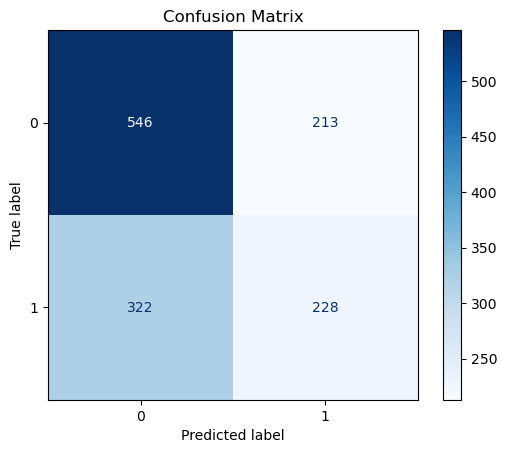

In [37]:
qda_metrics = evaluate_model(qda_model, ufc_test)

<div style="text-align: center;">
  üîπ <img src="../img/ufc_logo.png" width="50" /> üîπ
</div>

## 4. Save

In [23]:
save_model(knn_model, name='knn_best')

‚úÖ Model saved to: /home/mfourier/ufc-predictor/models/knn_best.pkl


In [24]:
save_model(svm_model, name='svm_best')

‚úÖ Model saved to: /home/mfourier/ufc-predictor/models/svm_best.pkl


In [25]:
save_model(lr_model, name='lr_best')

‚úÖ Model saved to: /home/mfourier/ufc-predictor/models/lr_best.pkl


In [26]:
save_model(rf_model, name='rf_best')

‚úÖ Model saved to: /home/mfourier/ufc-predictor/models/rf_best.pkl


In [27]:
save_model(ab_model, name='ab_best')

‚úÖ Model saved to: /home/mfourier/ufc-predictor/models/ab_best.pkl


In [28]:
save_model(nb_model, name='nb_best')

‚úÖ Model saved to: /home/mfourier/ufc-predictor/models/nb_best.pkl


In [29]:
save_model(et_model, name='et_best')

‚úÖ Model saved to: /home/mfourier/ufc-predictor/models/et_best.pkl


In [30]:
save_model(gb_model, name='gb_best')

‚úÖ Model saved to: /home/mfourier/ufc-predictor/models/gb_best.pkl


In [38]:
save_model(qda_model, name='qda_best')

‚úÖ Model saved to: /home/mfourier/ufc-predictor/models/qda_best.pkl


<div style="text-align: center;">
     <img src="../img/ufc_logo.png" width="800" /> 
</div>